In [1]:
import keras

Using TensorFlow backend.


In [ ]:
!conda install tensorflow

Solving environment: done

## Package Plan ##

  environment location: /home/dsc/anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-0.9.0              |           py37_0         165 KB
    astor-0.8.0                |           py37_0          45 KB
    blinker-1.4                |           py37_0          21 KB
    c-ares-1.15.0              |    h7b6447c_1001         102 KB
    cachetools-3.1.1           |             py_0          14 KB
    conda-4.8.3                |           py37_0         3.0 MB
    conda-package-handling-1.6.0|   py37h7b6447c_0         872 KB
    gast-0.2.2                 |           py37_0         137 KB
    google-auth-1.11.2         |             py_0          52 KB
    google-auth-oauthlib-0.4.1 |             py_2          21 KB
    google-pasta-0.1.8         |             py_0          43 KB
    

In [3]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

<img src="kschool.png" width="120" height="120" align="right"/>

# KNN-Algorithm 

<div class  = "alert alert-info">

Su nombre es k-nearest neighbours; es decir los k vecinos cercanos. La idea principal del algoritmo es, teniendo en cuenta un dataset de items y users con un rating inicial. Cuando se carga un nuevo item o user, ofrecer la puntuación media de los items/users más cercanos en el espacio.

</div>

<div class  = "alert alert-info">

Destacamos que es uno de los algoritmos más sencillos y que ofrencen mejores resultados en recsys, pero también en casi cualquier problema de regresión y clasificación supervisada.

</div>

### Ejemplo:

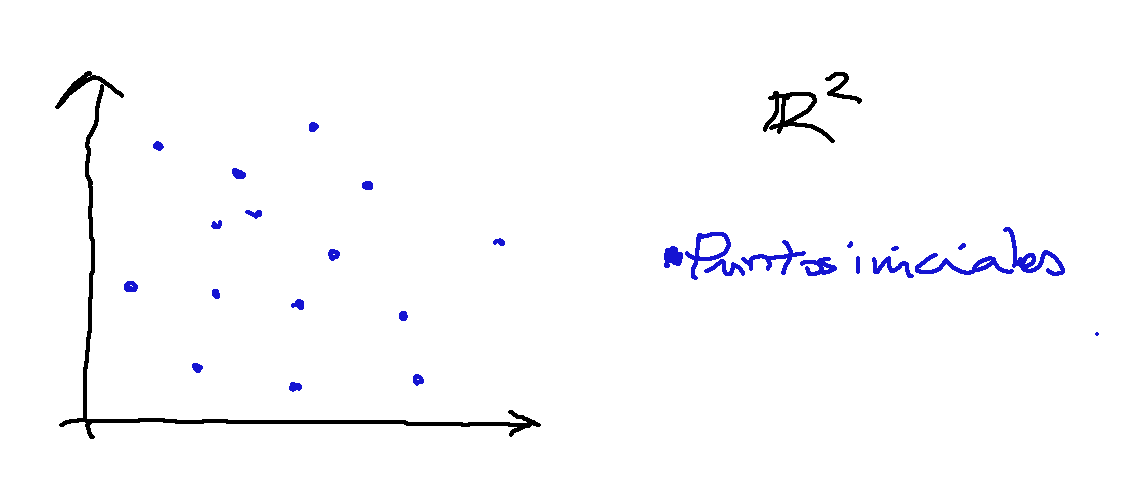


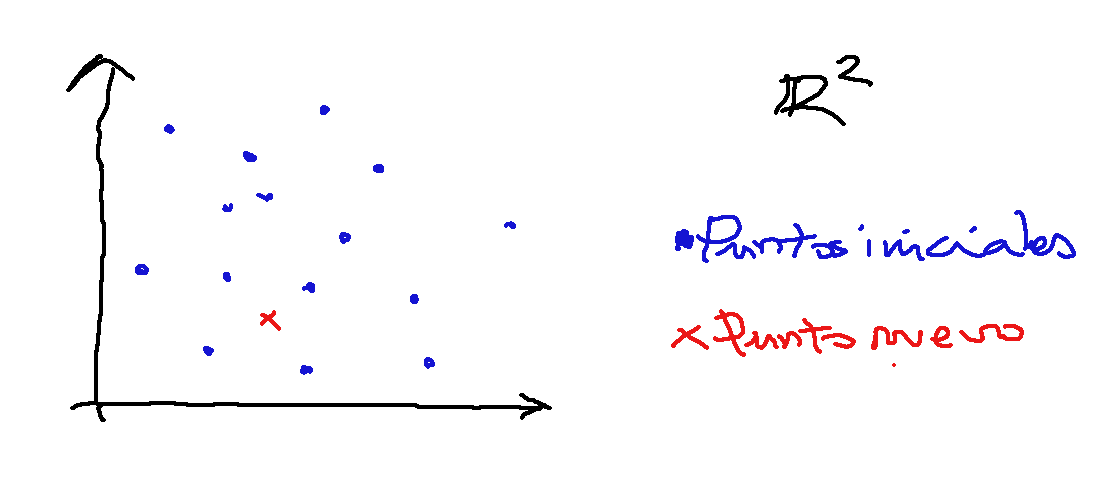

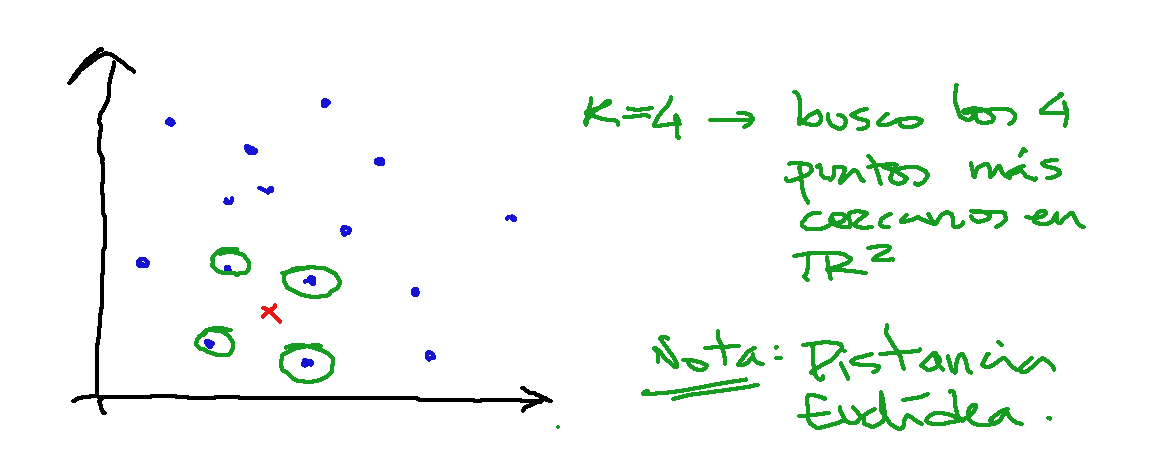

$$d(p_1,p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}$$

donde $p_1=(x_1,y_1)$ y $p_2=(x_2,y_2)$.

In [8]:
import math

def euclidean_distance(p1, p2):
    sum_squared_distance = 0
    
    # sumamos las diferencias cuadráticas en dimensión  
    for i in range(len(p1)):
        sum_squared_distance += math.pow(p1[i] - p2[i], 2)
    
    # devolvemos la raíz cuadrada
    return math.sqrt(sum_squared_distance)

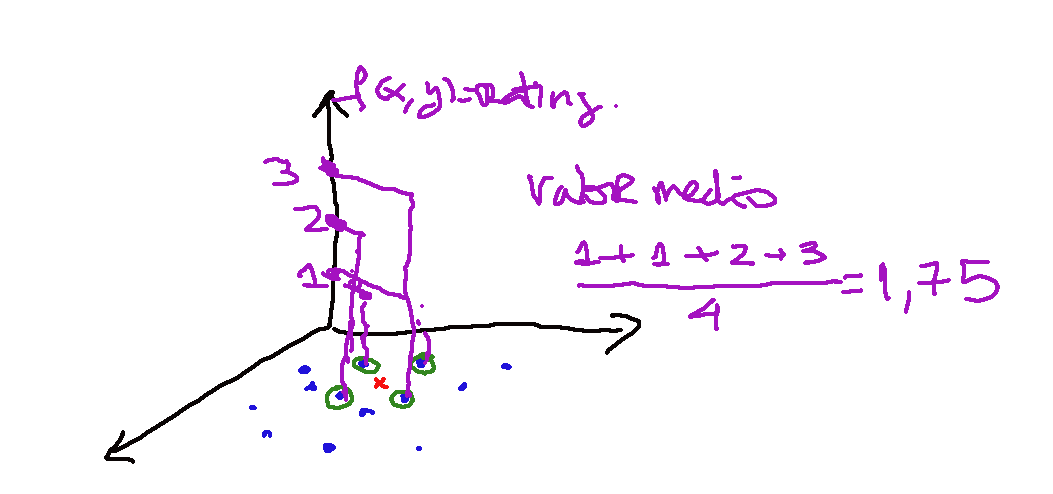

## Práctica

### Dataset

In [9]:
'''Leemos los ficheros donde están las peliculas y las votaciones de los usuarios'''

import pandas as pd

def read_movie_files(folder):

    pd_ratings = pd.read_csv(folder+'/ratings.csv')
    print('Number of rating records: ' + str(len(pd_ratings)))
    print('Total of users: ' + str(pd_ratings.userId.nunique()))
    
    pd_movies = pd.read_csv(folder+'/movies.csv')
    print('Total of movies: ' + str(pd_movies.movieId.nunique()))
    
    return pd_ratings, pd_movies

folder = './data/movies'
pd_ratings, pd_movies = read_movie_files(folder)

Number of rating records: 100836
Total of users: 610
Total of movies: 9742


### Matriz de géneros de películas

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
# Contamos el número de géneros y creamos una matriz con información numérica

import numpy as np

n_genres = '|'.join(pd_movies.genres)
n_genres = n_genres.split('|')

print(np.unique(n_genres))
print('Total of genres: ' + str(len(np.unique(n_genres))))

['(no genres listed)' 'Action' 'Adventure' 'Animation' 'Children' 'Comedy'
 'Crime' 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'IMAX'
 'Musical' 'Mystery' 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']
Total of genres: 20


In [12]:
pd_genres = pd_movies.copy(deep=True)

pd_genres['Action']      = pd_genres.genres.apply(lambda x: 1 if 'Action' in x else 0)
pd_genres['Adventure']   = pd_genres.genres.apply(lambda x: 1 if 'Adventure' in x else 0)
pd_genres['Animation']   = pd_genres.genres.apply(lambda x: 1 if 'Animation' in x else 0)
pd_genres['Children']    = pd_genres.genres.apply(lambda x: 1 if 'Children' in x else 0)
pd_genres['Comedy']      = pd_genres.genres.apply(lambda x: 1 if 'Comedy' in x else 0)
pd_genres['Crime']       = pd_genres.genres.apply(lambda x: 1 if 'Crime' in x else 0)
pd_genres['Documentary'] = pd_genres.genres.apply(lambda x: 1 if 'Documentary' in x else 0)
pd_genres['Drama']       = pd_genres.genres.apply(lambda x: 1 if 'Drama' in x else 0)
pd_genres['Fantasy']     = pd_genres.genres.apply(lambda x: 1 if 'Fantasy' in x else 0)
pd_genres['Film-Noir']   = pd_genres.genres.apply(lambda x: 1 if 'Film-Noir' in x else 0)
pd_genres['Horror']      = pd_genres.genres.apply(lambda x: 1 if 'Horror' in x else 0)
pd_genres['IMAX']        = pd_genres.genres.apply(lambda x: 1 if 'IMAX' in x else 0)
pd_genres['Musical']     = pd_genres.genres.apply(lambda x: 1 if 'Musical' in x else 0)
pd_genres['Mystery']     = pd_genres.genres.apply(lambda x: 1 if 'Mystery' in x else 0)
pd_genres['Romance']     = pd_genres.genres.apply(lambda x: 1 if 'Romance' in x else 0)
pd_genres['Sci-Fi']      = pd_genres.genres.apply(lambda x: 1 if 'Sci-Fi' in x else 0)
pd_genres['Thriller']    = pd_genres.genres.apply(lambda x: 1 if 'Thriller' in x else 0)
pd_genres['War']         = pd_genres.genres.apply(lambda x: 1 if 'War' in x else 0)
pd_genres['Western']     = pd_genres.genres.apply(lambda x: 1 if 'Western' in x else 0)

pd_genres = pd_genres.drop('genres', axis=1)
pd_genres.head()

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Recomendaciones sobre una película:

In [13]:
"""Elegimos una película conociendo su posición en el espacio"""

id_film = pd_genres[pd_genres.title=='Jumanji (1995)'].movieId.to_numpy()
print('id_film: ' + str(id_film))

space_position = pd_genres[pd_genres.title=='Jumanji (1995)'].iloc[0,2:].to_numpy()
print('space_position: ' + str(space_position))

id_film: [2]
space_position: [0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


In [14]:
"""Nos disponemos a buscar la distancia de nuestro punto con todos los puntos del espacio.
   Luego tomaremos los más cercanos."""

movies_distances = list()
for i in range(len(pd_genres)):
    space_position_point = pd_genres.iloc[i,2:].to_numpy()
    distance_point = euclidean_distance(space_position, space_position_point)
    movies_distances.append([i+1 , distance_point])
    
pd_movies_distances = pd.DataFrame(movies_distances, columns=['movieId', 'dist'])
pd_movies_distances = pd.merge(pd_movies_distances, pd_movies[['movieId','title']], on='movieId')
pd_movies_distances.head()

,movieId,dist,title
0,1,1.414214,Toy Story (1995)
1,2,0.000000,Jumanji (1995)
2,3,2.236068,Grumpier Old Men (1995)
3,4,2.449490,Waiting to Exhale (1995)
4,5,2.000000,Father of the Bride Part II (1995)


# Ejercicio:

<div class  = "alert alert-warning">
    
- Utilizar el algoritmo knn para recomendar las mejores películas que puede ver el usuario 5, recomendar la película "Waiting to Exhale" para k=3 y k=5
    
</div>